# <center> Project 1 - Unsupervised Learning Classification</center>
## <center> Due: Oct 15$^{th}$ 11:59 PM</center>

In this project, we are going to implement models. Unfortunately, the data set, `CS559_Fall21_Project1_02.csv`, is not labeled except the target, `Class`, and therefore, we can not straightly use supervised leanring algorithms until we learn about data - using unsupervised learning techniques in preprocessing is essential. To build models, we are allowed to use any of provided modules and libraries. **The exploratory and feature engineerings are required but not limited - all your work and process must be justified and explained in notebook.**

### Models:
- You are going to build three different classifiers using KMeans, K Nearest Neighbor (KNN), and Logistic Regression. 
    - KMeans: KMeans arbitrary use ID indices. Cluster ID indicates the subgroup number each observation belongs to and **it does not neccessary need to have the same ID as the target ID**. The task is to check whether the model clusters and subgroups each observation to the same classes. Then perform data preprocessing in order to subgroup observations correctly as much as possible. In order to check the accuracy of clustering, the cluster IDs  may need to be **relabeled** to match with their subgroup `Class` IDs. 
    - KNN: The accuracy of KNN will likely to decrease as k value increases. The task is to determine the threshold of k value reaches to **95%**. 
    - Logistic Regression: There are several assumptions/conditions needed in order for Logistic Regression to perform well. The task is to EDA to verify if the data is suitable for Logistic Regression and perform data preprocessing to raise the accuracy of model as high as possible. When the model was applied to the raw data, the accuracy was around 35%. 
- In this project, we are not interested in optimizing the models by tunning hyperparameters. Therefore, validation and testing are not necessary. Use the entire dataset as a train data set.     
- Accuracy Report: The accuracy is the accuracy of trained model (remember that we do not split the data set). The accuracy must be reported in Data Frame format as an example shown below. When you report the accuracy of models, please provide the name of algorithms, number of features used, and the accuracy in percentile. 
|Model Number | Algorithm (s)| Number of features | Accuracy (%)|
|---|---|---|---|
| 0 | Logistic Regression | 3 | 35%|
| 1 | KMeans | -- | -- |
| 2 | KNN | -- | -- |
| 3 | Logistic Regression | -- | -- |

### Grade Scheme: 

| Components | Maximum Points |
| --- | --- |
| Effort (cleanness, completeness, etc)| 20 |
| EDA and Feature Engineering (w/ visualizations) | 20 |
| Modeling | 20 |
| Explanation (w/ visualizations) | 20 |
| Result | 20 |


### Submission:
- No formal report. However, all work (EDA, Preprocessing, Modeling) must be **explained and summarized** at the end of each model, not in the middle of implementations. 
- Submit the notebook and its exported HTML files. 
- Considering the working period of the project, **NO LATE SUBMISSIONS ARE ACCEPTED**. 
- No resubmissions due to incorrect files, corrections, etc. 

#### Below, the libraries needed for this project are provided and plotting in 2-D and 3-D are also provided. 

In [339]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [340]:
def plot_2D(df,comp1,comp2,target):
    sns.scatterplot(x=comp1,y=comp2,data=df,hue=target)

def plot_3D(df, comp1,comp2,comp3,target):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[comp1],df[comp2],df[comp3],c=df[target])
    ax.set_xlabel(comp1)
    ax.set_ylabel(comp2)
    ax.set_zlabel(comp3)
    plt.show()

In [683]:
data = pd.read_csv('./CS559_Fall21_Project1_02.csv')

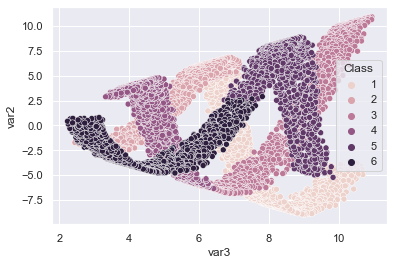

In [684]:
plot_2D(df,'var1', 'var2','Class')

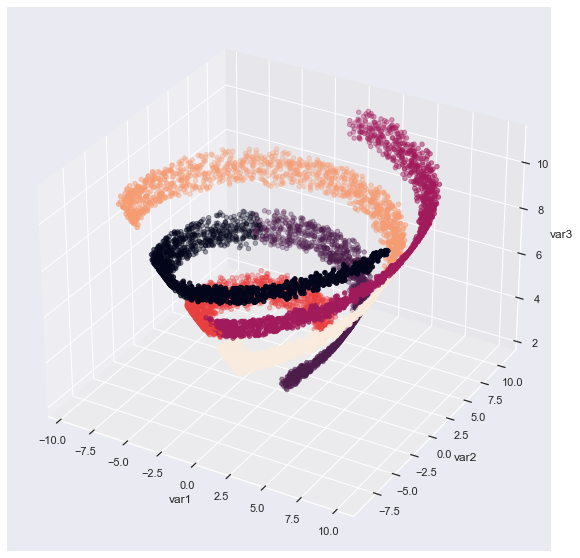

In [710]:
plot_3D(df,'var1','var2','var3','Class')

### Project 1 Starts from here

#### Model 1: KMeans

##### EDA / Preprocessing

In [711]:
print('null values\n',data.isnull().sum())

null values
 var1     0
var2     0
var3     0
var4     0
var5     0
var6     0
var7     0
var8     0
var9     0
Class    0
dtype: int64


In [712]:
print('\n\nduplicates\n',data.duplicated().sum())



duplicates
 0


In [729]:
print('\n\ndata head:\n',data.head())
print('\n\ndata tail:\n',data.tail())



data head:
      var1    var2     var3     var4     var5     var6     var7     var8  \
0  9.4202 -4.3507  10.3764  0.66768  0.33387  0.33355  0.33399  0.33367   
1  9.7044 -4.4601  10.6803  0.66749  0.33360  0.33352  0.33345  0.33363   
2  9.8075 -4.0894  10.6259  0.66742  0.33347  0.33315  0.33301  0.33364   
3  9.2771 -4.0349  10.1166  0.66782  0.33322  0.33394  0.33379  0.33380   
4  9.6447 -3.5968  10.2936  0.66768  0.33391  0.33301  0.33306  0.33326   

      var9  Class  
0  0.33391      1  
1  0.33395      1  
2  0.33364      1  
3  0.33391      1  
4  0.33329      1  


data tail:
         var1     var2    var3     var4     var5     var6     var7     var8  \
7495 -2.3611  0.25915  2.3753  0.33380  0.33384  0.33314  0.33309  0.33313   
7496 -2.6091  0.29695  2.6259  0.33360  0.33322  0.33303  0.33310  0.33350   
7497 -2.7131  0.24234  2.7239  0.33363  0.33349  0.33388  0.33359  0.33356   
7498 -3.0334  0.79411  3.1356  0.33371  0.33382  0.33358  0.33339  0.33335   
7499 -2.472

In [714]:
data.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.500111,0.499832,6.597365,0.389170,0.389211,0.389170,0.389210,0.389167,0.389208,3.500400
std,4.864072,4.860222,2.061535,0.124483,0.124526,0.124480,0.124528,0.124479,0.124528,1.707939
min,-9.455200,-8.952900,2.231800,0.333000,0.333000,0.333000,0.333000,0.333000,0.333000,1.000000
25%,-3.352225,-3.565250,4.809175,0.333307,0.333300,0.333300,0.333290,0.333300,0.333290,2.000000
50%,0.696940,0.254730,6.609200,0.333600,0.333590,0.333615,0.333600,0.333610,0.333590,4.000000
75%,4.512175,4.404975,8.355375,0.333900,0.333900,0.333900,0.333900,0.333900,0.333900,5.000000
max,9.823100,10.930000,10.952700,0.668000,0.668000,0.668000,0.668000,0.668000,0.668000,6.000000


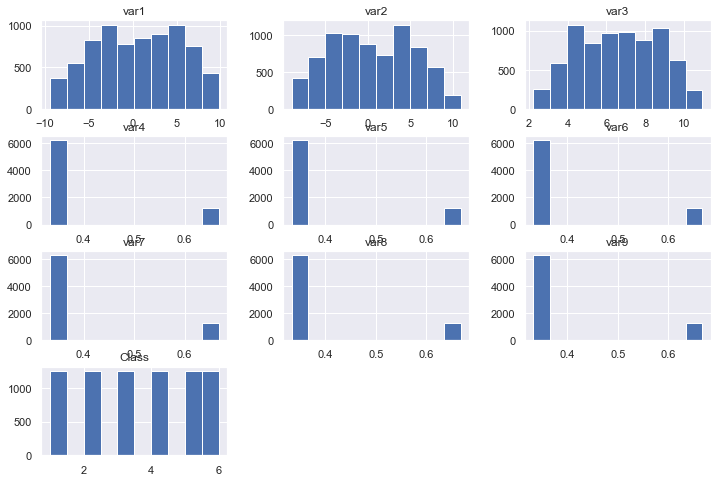

In [715]:
data.head(5)
data.hist(figsize=(12,8))
plt.show()

In [688]:
#drop ID column
data = data.drop('var0',axis=1)
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')


,var1,var2,var3,var4,var5,var6,var7,var8,var9,Class
var1,1.000000,-0.001150,0.165205,-0.196908,0.160217,0.441620,-0.261986,-0.245783,0.102911,-0.046463
var2,-0.001150,1.000000,0.162642,-0.396994,0.210011,0.026827,0.032716,0.371534,-0.243999,0.136978
var3,0.165205,0.162642,1.000000,0.285677,-0.285425,0.426891,-0.408041,0.404614,-0.423195,-0.252095
var4,-0.196908,-0.396994,0.285677,1.000000,-0.199162,-0.200029,-0.200025,-0.200033,-0.200108,-0.654540
var5,0.160217,0.210011,-0.285425,-0.199162,1.000000,-0.200102,-0.200172,-0.200055,-0.200198,-0.393054
var6,0.441620,0.026827,0.426891,-0.200029,-0.200102,1.000000,-0.199156,-0.200007,-0.200076,-0.130842
var7,-0.261986,0.032716,-0.408041,-0.200025,-0.200172,-0.199156,1.000000,-0.200106,-0.200161,0.130868
var8,-0.245783,0.371534,0.404614,-0.200033,-0.200055,-0.200007,-0.200106,1.000000,-0.199155,0.392910
var9,0.102911,-0.243999,-0.423195,-0.200108,-0.200198,-0.200076,-0.200161,-0.199155,1.000000,0.654867
Class,-0.046463,0.136978,-0.252095,-0.654540,-0.393054,-0.130842,0.130868,0.392910,0.654867,1.000000


In [717]:
#function to find which columns have colinearity more than cutoff
def find_correlation(df, cut = 0.9) :
    # Get correlation matrix and upper triagle
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis = 1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    drop = list()
    # For loop implements this pseudocode
    # For every cell in the upper triangle: 
        # If cell.value > 0.6: 
                # If mean(row_correlation) > mean(column_correlation):drop(column)
        # Else: drop(row)
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range (col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    drop.append(row)
                else: 
                    drop.append(col)
    drop_set = list(set(drop))
    # dropcols_idx = drop_set
    dropcols_names = list(df.columns[[item for item in drop_set]])
    return(dropcols_names)

#print name of columns with Corr>0.4
names = find_correlation(df.drop(['Class'],axis=1),0.4)
print('Possible Columns to drop',names)

Possible Columns to drop ['var3', 'var6']


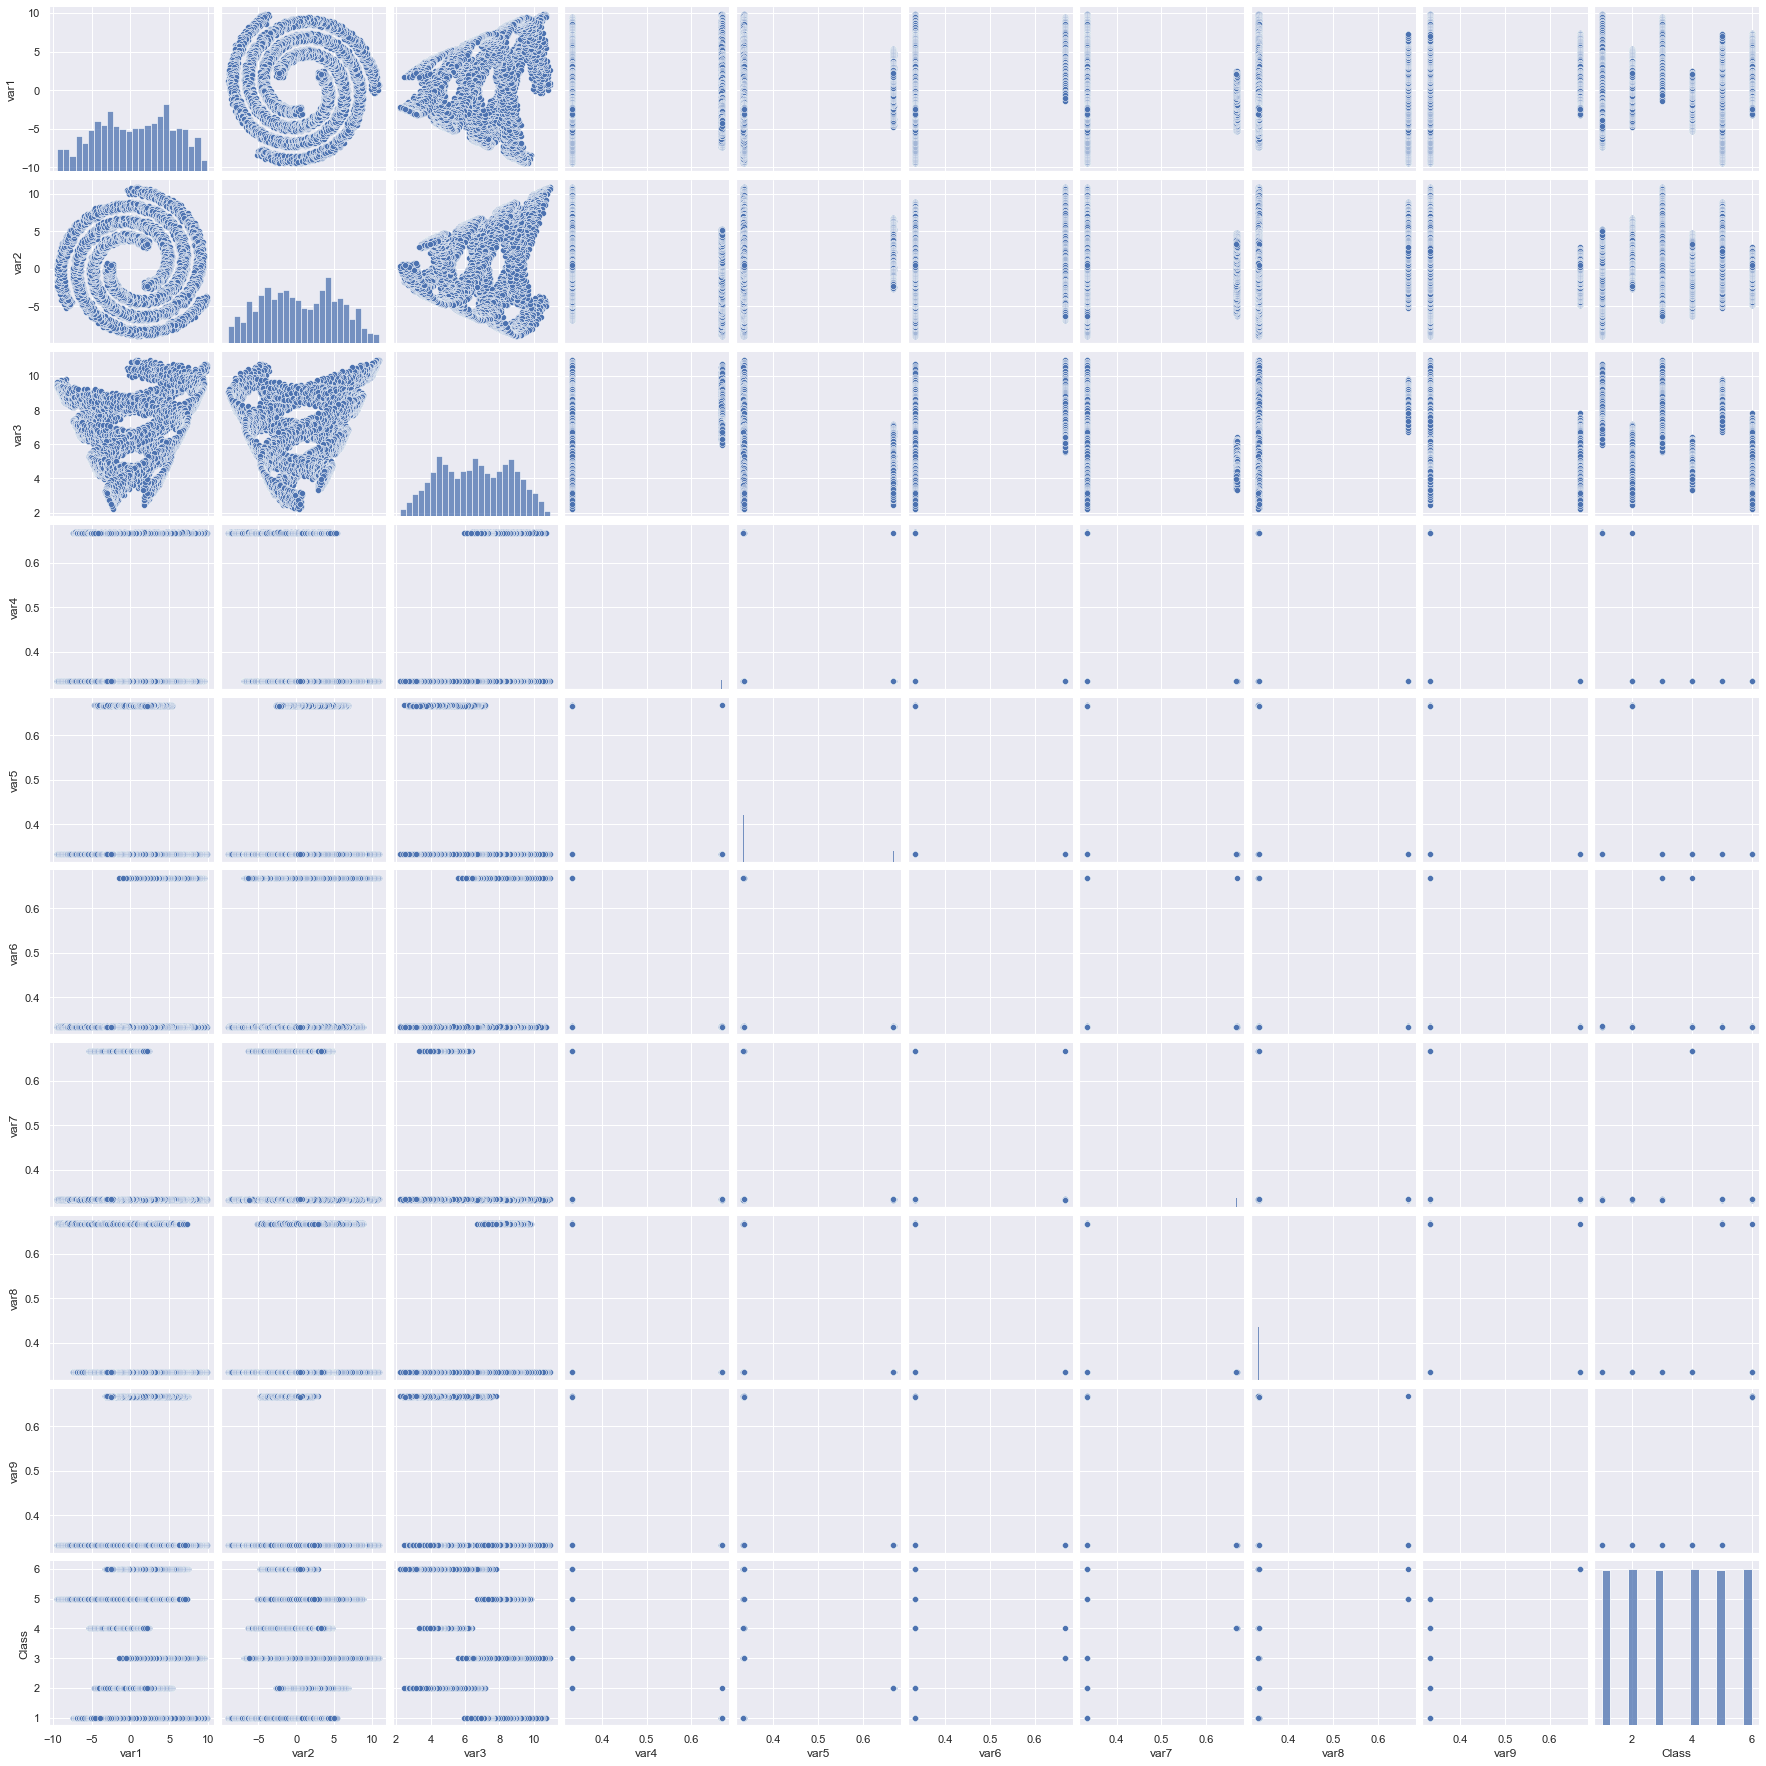

In [690]:
sns.set()
sns.pairplot(data, height = 2.5)
plt.show();

In [721]:
df = data
#scaling
scaler = MinMaxScaler()     
scaler.fit(df.drop('Class',axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('Class',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.516400,0.475420,0.500587,0.167671,0.167793,0.167672,0.167791,0.167663,0.167785
std,0.252308,0.244442,0.236390,0.371592,0.371719,0.371584,0.371725,0.371578,0.371724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316572,0.270969,0.295540,0.000918,0.000896,0.000896,0.000866,0.000896,0.000866
50%,0.526610,0.463093,0.501944,0.001791,0.001761,0.001836,0.001791,0.001821,0.001761
75%,0.724513,0.671827,0.702172,0.002687,0.002687,0.002687,0.002687,0.002687,0.002687
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [722]:
pcaKM = PCA(0.95)
pcaKM.fit(scaled_features)
print('pca components ',pcaKM.n_components_)
print('pca evr        ',pcaKM.explained_variance_ratio_)
print('info retained  ',pcaKM.explained_variance_ratio_.sum())
pcafeatures=pcaKM.transform(scaled_features)
#convert in dataframe to plot pairwise corr()
pcadf = pd.DataFrame(pcafeatures,columns=['c1','c2','c3','c4','c5','c6'])
corr = pcadf.corr()
corr.style.background_gradient(cmap='coolwarm')

pca components  6
pca evr         [0.20977262 0.19083987 0.18759705 0.16458799 0.16458322 0.03746665]
info retained   0.9548474058957656


,c1,c2,c3,c4,c5,c6
c1,1.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
c2,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000
c3,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000
c4,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
c5,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000
c6,-0.000000,-0.000000,0.000000,0.000000,-0.000000,1.000000


##### Model Implementation

In [693]:
##### Model Implementation starts here
kmeans = KMeans(n_clusters=6) 
kmeans.fit(pcafeatures)
pred_clusters = kmeans.predict(pcafeatures)
#split prediction by target class
clusters = np.split(pred_clusters,6,axis=0)    
#find cluster id assigned by k-means and sum the correct classifications
correct_pred=0
for cluster_id in clusters:
    cluster_id=cluster_id.tolist()
    max_id=0
    for i in cluster_id:
        freq=cluster_id.count(i)
        if freq>max_id:
            max_id=freq
    correct_pred += max_id
#calculate accuracy = sum of correct classification/number of observations
kmeans_accuracy = correct_pred/len(pred_clusters)
print(kmeans_accuracy)

0.9997333333333334


##### Summary:

In [694]:
# EDA summary
# (1) we check if our Data has any null and duplicate values, we find none
# (2) we check data description and histograms to see the statistical summary of each variable
# (3) Here we find that 'var0' is clearly an id column, this will heavyly bias the predictions so we need to drop it
# (5) when we look at the correlation matrix we find that var3 and var6 have moderate 
#     multicolinearity and might affect the results
# (6) var1,var2,var3 ranges and var4 to var9 ranges are different by an entire order of magnitude, we need proper scaling
# Preprocessing summary
# (1) we drop var0 as it is clearly and id column
# (2) k-means is resistant to colinearity so we dont need to drop moderately correlated columns,instead we can use
#     PCA or LDA for dimensionality reduction, and the dataset is small so PCA will perform better.
#     so we use PCA to reduce dimensions and reduce colinearity by transforming the data with max separation
# (3) we scale the data using min/max scaling as it increases separation by introducing normality
# (4) we find that at 95% retention of information, we have 6 PCA components, we transform the data
# (5) we apply the simplified model with 6 features to the kmeans algorithm

#### Model 2: KNN

##### EDA / Preprocessing

In [723]:
##### EDA 
# EDA is Same as in question 1
# Preprocessing starts here
from sklearn.preprocessing import StandardScaler
df = data
#scaling
scaler = MinMaxScaler()     
scaler.fit(df.drop('Class',axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('Class',axis=1))

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.516400,0.475420,0.500587,0.167671,0.167793,0.167672,0.167791,0.167663,0.167785
std,0.252308,0.244442,0.236390,0.371592,0.371719,0.371584,0.371725,0.371578,0.371724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316572,0.270969,0.295540,0.000918,0.000896,0.000896,0.000866,0.000896,0.000866
50%,0.526610,0.463093,0.501944,0.001791,0.001761,0.001836,0.001791,0.001821,0.001761
75%,0.724513,0.671827,0.702172,0.002687,0.002687,0.002687,0.002687,0.002687,0.002687
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [724]:
pcaKNN = PCA(0.95)
pcaKNN.fit(scaled_features)
print('pca components ',pcaKNN.n_components_)
print('pca evr        ',pcaKNN.explained_variance_ratio_.sum())
pcafeatures=pcaKNN.transform(scaled_features)
#convert in dataframe to plot pairwise corr()
pcadf = pd.DataFrame(pcafeatures,columns=['c1','c2','c3','c4','c5','c6'])
corr = pcadf.corr()
corr.style.background_gradient(cmap='coolwarm')

pca components  6
pca evr         0.9548474058957656


,c1,c2,c3,c4,c5,c6
c1,1.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
c2,0.000000,1.000000,-0.000000,0.000000,-0.000000,-0.000000
c3,-0.000000,-0.000000,1.000000,0.000000,-0.000000,0.000000
c4,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
c5,-0.000000,-0.000000,-0.000000,0.000000,1.000000,-0.000000
c6,-0.000000,-0.000000,0.000000,0.000000,-0.000000,1.000000


##### Model Implementation

In [697]:
##### Model Implementation starts here
#pick k value such that accuracy caps at 95%, (loop will take a lot of time to run)
# kval = []
# for i in range(1,len(pcafeatures)):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(pcafeatures,df['Class'])
#     pred_i = knn.predict(pcafeatures)
#     if(0.04975<=np.mean(pred_i != df['Class'])<=0.5025):
#         kval.append(i)

knn = KNeighborsClassifier(n_neighbors=4695)
knn.fit(pcafeatures,df['Class'])
pred = knn.predict(pcafeatures)
KNN_accuracy  = accuracy_score(df['Class'],pred)
print(KNN_accuracy)

0.95


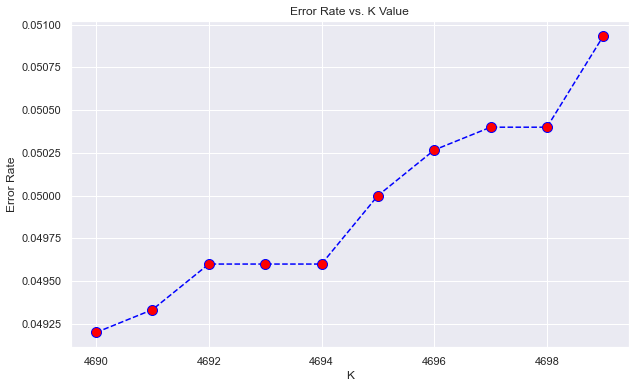

In [553]:
#plot k value
error_rate = []

# Will take some time
for i in range(4690,4700):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(pcafeatures,df['Class'])
    pred_i = knn.predict(pcafeatures)
    error_rate.append(np.mean(pred_i != df['Class']))
    
#plot
plt.figure(figsize=(10,6))
plt.plot(range(4690,4700),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


#### Summary:

In [ ]:
# EDA summary
# (1)we check if our Data has any null and duplicate values, we find none
# (2)we check data description and histograms to see the statistical summary of each variable
# (3)Here we find that 'var0' is clearly an id column, this will heavyly bias the predictions so we need to drop it
# (5)when we look at the correlation matrix we find that var3 and var6 have moderate 
#    multicolinearity and might affect the results
# (6)var1,var2,var3 ranges and var4 to var9 ranges are different by an entire order of magnitude, we need proper scaling
# Preprocessing summary
# (1) we drop var0 as it is clearly and id column
# (2) KNN is not resistant to colinearity so we need to drop correlated columns but we lose information,
#     instead we can use PCA to reduce dimensions and reduce colinearity by transforming the data with max separation
# (3) we scale the data using min/max scaling as it increases separation by introducing normality
# (4) we find that at 95% retention of information, we have 6 PCA components, we transform the data
# (5) we apply the simplified model with 6 features to the KNN algorithm
# (6) we find that at k value of 4695 the accuracy caps at 95%

#### Model 3: Logistic Regression

##### EDA / Preprocessing

In [725]:
##### EDA / Preprocessing starts here
##### EDA / Preprocessing starts here
from sklearn.preprocessing import StandardScaler
df =data
#id column dropped
#scale the data
scaler = StandardScaler()
scaler.fit(df.drop('Class',axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('Class',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9
count,7500.000000,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,0.000000,3.031649e-17,1.515825e-16,9.094947e-17,4.547474e-16,-2.122154e-16,1.212660e-16,1.818989e-16,-1.818989e-16
std,1.000067,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-2.046839,-1.945048e+00,-2.117769e+00,-4.512531e-01,-4.514272e-01,-4.512671e-01,-4.514153e-01,-4.512497e-01,-4.513989e-01
25%,-0.792051,-8.364543e-01,-8.674647e-01,-4.487828e-01,-4.490179e-01,-4.488569e-01,-4.490864e-01,-4.488395e-01,-4.490699e-01
50%,0.040469,-5.043356e-02,5.741341e-03,-4.464329e-01,-4.466889e-01,-4.463262e-01,-4.465968e-01,-4.463489e-01,-4.466607e-01
75%,0.824891,8.035443e-01,8.528244e-01,-4.440228e-01,-4.441993e-01,-4.440365e-01,-4.441875e-01,-4.440191e-01,-4.441711e-01
max,1.916832,2.146170e+00,2.112807e+00,2.240050e+00,2.238956e+00,2.240097e+00,2.238925e+00,2.240153e+00,2.238948e+00


In [726]:
# pca = PCA(.95)
#we need to find accuract at 3 features
pcaLR = PCA(n_components=3)
pcaLR.fit(scaled_features)
pcafeatures=pcaLR.transform(scaled_features)
#convert in dataframe to plot pairwise corr()
pcadf = pd.DataFrame(pcafeatures,columns=['c1','c2','c3'])
corr = pcadf.corr()
corr.style.background_gradient(cmap='coolwarm')

,c1,c2,c3
c1,1.000000,-0.000000,0.000000
c2,-0.000000,1.000000,0.000000
c3,0.000000,0.000000,1.000000


##### Model Implementation

In [700]:
##### Model Implementation starts here
logreg = LogisticRegression()
model.fit(pcafeatures, df['Class'])
yhat = model.predict(pcafeatures)
LR_accuracy = accuracy_score(df['Class'],yhat)
print(accuracy_score(df['Class'],yhat))

0.9996


##### Summary:

In [701]:
# EDA summary
# (1)we check if our Data has any null and duplicate values, we find none
# (2)we check data description and histograms to see the statistical summary of each variable
# (3)Here we find that 'var0' is clearly an id column, this will heavyly bias the predictions so we need to drop it
# (5)when we look at the correlation matrix we find that var3 and var6 have moderate 
#    multicolinearity and might affect the results
# (6)var1,var2,var3 ranges and var4 to var9 ranges are different by an entire order of magnitude, we need proper scaling
# Preprocessing summary
# (1) we drop var0 as it is clearly and id column
# (2) Logistic Regression is not resistant to multi-colinearity so we need to drop correlated columns but we lose information,
#     instead we can use PCA to reduce dimensions and reduce colinearity by transforming the data with max separation
# (3) we scale the data using standard scaling for getting ranges into similar order of magnitude
# (4) we need to reduce components to 3 for comparing raw data accuracy which was 35%, we transform the data
# (5) we apply the simplified model with 3 features to the Logistic Regression algorithm

### Final Result Table:

In the result table, show only the **best result** obtained in each model. If the dataset were splitted into train and test sets, report the average of accuracy of train and test sets. 

In [727]:
Result = pd.DataFrame([['0','Logistic Regression','3','35'],
                       ['1','K-Means',pcaKM.n_components_,kmeans_accuracy*100],
                       ['2','KNN',pcaKNN.n_components_,KNN_accuracy*100],
                       ['3','Logistic Regression',pcaLR.n_components_,LR_accuracy*100]], 
                      columns = ['Model Number', 'Algorithm','Number of Features','Accuracy(%)'])

print(Result)


  Model Number            Algorithm Number of Features Accuracy(%)
0            0  Logistic Regression                  3          35
1            1              K-Means                  6   99.973333
2            2                  KNN                  6        95.0
3            3  Logistic Regression                  3       99.96
